In [1]:
from basata.datasets import get_data
from basata.supervised import *

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
plt.style.use("classic")
sns.set(style ='darkgrid')
random_seed_val = 100

In [2]:
df = get_data("titanic")

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


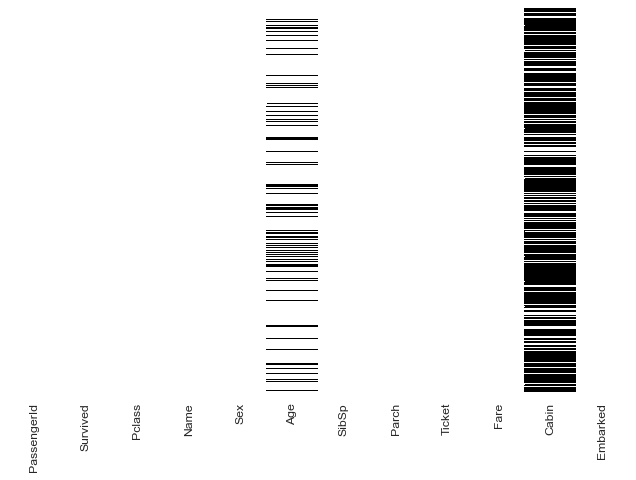

In [5]:
null(df)

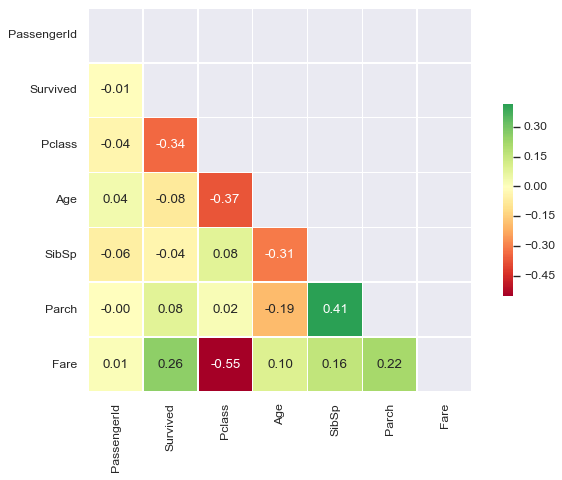

In [6]:
correlation(df)

#### EDA

In [7]:
eda(df)

Done! Use 'show' commands to display/save.   |██████████| [100%]   00:00 -> (00:00 left)


Report sweet_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


#### Train-Test Split

In [8]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [9]:
from sklearn.model_selection import train_test_split

X = df.loc[:,['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']]

y = df.loc[:,['Survived']]

random_seed_val = 100

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_seed_val, stratify=y)


#### Preprocess

In [10]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=4)

def preprocess(DataFrame):
    
    # Iterate through dataframe and extract title from name column
    DataFrame['Title'] = DataFrame['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
    
    # Replace titles with more common titles
    DataFrame['Title'] = DataFrame['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
        'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Other')
    DataFrame['Title'] = DataFrame['Title'].replace('Mlle', 'Miss')
    DataFrame['Title'] = DataFrame['Title'].replace('Ms', 'Miss')
    DataFrame['Title'] = DataFrame['Title'].replace('Mme', 'Mrs')

    # Drop columns
    DataFrame.drop(['Name', 'Ticket', 'Cabin', 'PassengerId'], axis=1, inplace=True)

    # Create dummies
    DataFrame = pd.get_dummies(DataFrame, columns=['Pclass', 'Sex', 'Embarked', 'Title'], drop_first=False)
    
    # Imouter (Handling missing values)
    column = DataFrame.columns
    DataFrame = pd.DataFrame(imputer.fit_transform(DataFrame), columns = column)
    
    # Round age
    DataFrame['Age'] = np.round(DataFrame['Age'].values).astype('int64')

    # Create bins from age columm in a new column
    DataFrame['AgeBin'] = pd.qcut(DataFrame['Age'], q=5, labels=False)

    DataFrame.dropna()

    return DataFrame

X_train = preprocess(X_train)


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

In [12]:
X_train.head()

,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Other,AgeBin
0,71,0.0,0.0,34.6542,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,4
1,16,0.0,0.0,8.0500,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0
2,26,0.0,0.0,7.8958,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1
3,30,0.0,0.0,7.2292,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2
4,26,0.0,0.0,8.0500,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1


#### Feature importance

,feature,feature_importance
0,Fare,0.231082
1,Age,0.190736
2,Title_Mr,0.112288
3,Sex_male,0.074151
4,Sex_female,0.063906
5,SibSp,0.057353
6,AgeBin,0.052928
7,Pclass_3,0.042429
8,Parch,0.035474
9,Pclass_1,0.028260


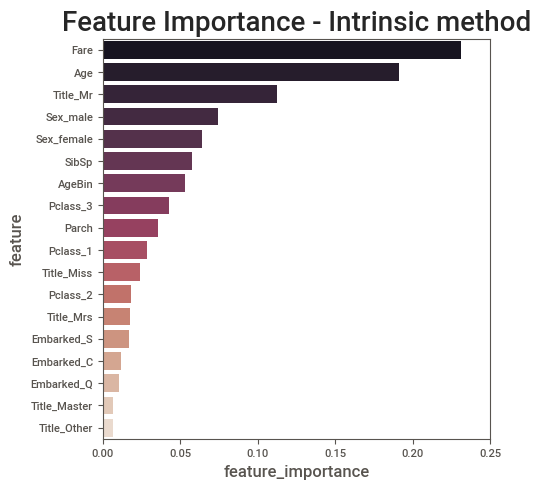

In [13]:
# random forest for feature importance on a classification problem
from sklearn.ensemble import RandomForestClassifier

# define the model
rf = RandomForestClassifier(n_jobs=-1, random_state=5)

# fit the model
rf.fit(X_train, y_train)

#Create table
FID(X_train, rf)

In [14]:
compare_models(X_train, y_train)

UnboundLocalError: local variable 'lgb' referenced before assignment

#### Model Training

In [ ]:
X_test = preprocess(X_test)

/Users/family/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3163: SettingWithCopyWarning:
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/family/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:4155: SettingWithCopyWarning:
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


/Users/family/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning:Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.


Learning rate set to 0.008911
0:	learn: 0.6880149	total: 1.31ms	remaining: 1.31s
1:	learn: 0.6828084	total: 2.57ms	remaining: 1.28s
2:	learn: 0.6782369	total: 3.81ms	remaining: 1.27s
3:	learn: 0.6724202	total: 5.04ms	remaining: 1.25s
4:	learn: 0.6670325	total: 6.12ms	remaining: 1.22s
5:	learn: 0.6622282	total: 7.33ms	remaining: 1.21s
6:	learn: 0.6581784	total: 8.23ms	remaining: 1.17s
7:	learn: 0.6534060	total: 9.11ms	remaining: 1.13s
8:	learn: 0.6492707	total: 10ms	remaining: 1.1s
9:	learn: 0.6449620	total: 10.7ms	remaining: 1.05s
10:	learn: 0.6399401	total: 11.6ms	remaining: 1.04s
11:	learn: 0.6351674	total: 12.8ms	remaining: 1.05s
12:	learn: 0.6310454	total: 13.8ms	remaining: 1.05s
13:	learn: 0.6268990	total: 14.8ms	remaining: 1.04s
14:	learn: 0.6236868	total: 15.8ms	remaining: 1.04s
15:	learn: 0.6197263	total: 16.8ms	remaining: 1.04s
16:	learn: 0.6158244	total: 18.2ms	remaining: 1.05s
17:	learn: 0.6121739	total: 19.1ms	remaining: 1.04s
18:	learn: 0.6085290	total: 20.1ms	remaining: 1

ROC curves: 100%|██████████| 9/9 [00:00<00:00, 558.62it/s]


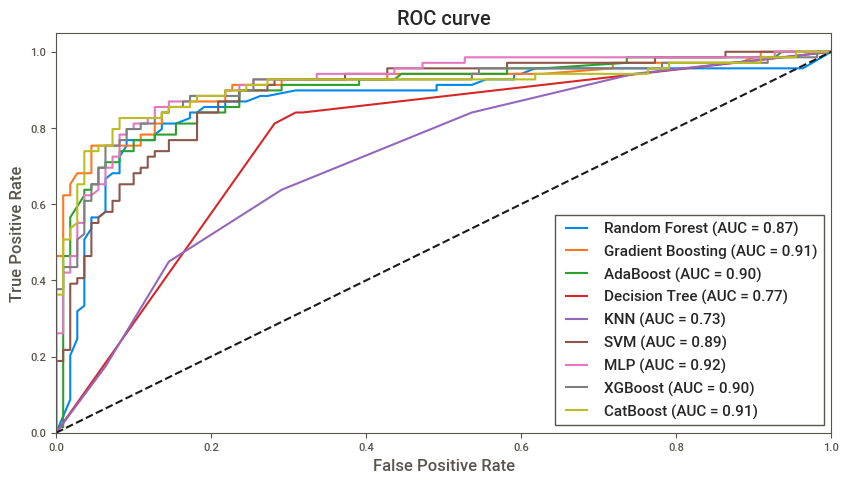

Precision Recall Curve: 100%|██████████| 9/9 [00:00<00:00, 17.10it/s]


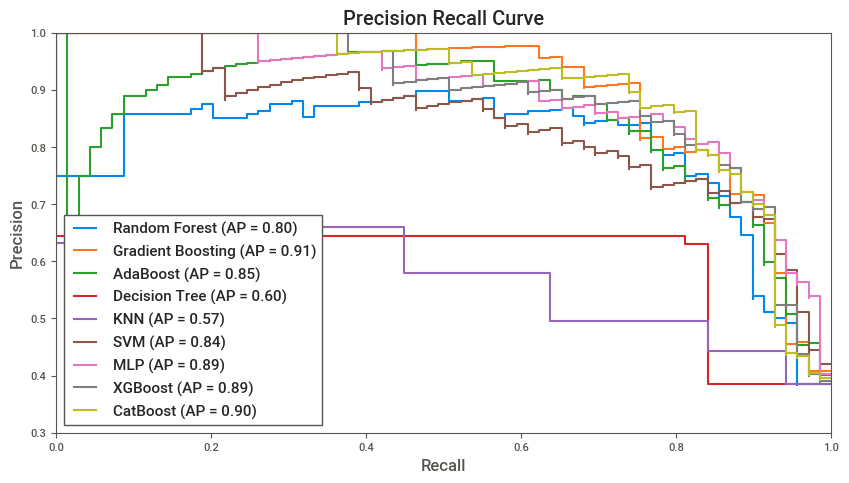

,Accuracy,Recall,Precision,F1,Balanced Accuracy,ROC AUC
Gradient Boosting,0.849162,0.855072,0.776316,0.813793,0.850264,0.912385
MLP,0.849162,0.869565,0.769231,0.816327,0.852964,0.919433
XGBoost,0.849162,0.884058,0.762500,0.818792,0.855665,0.904282
CatBoost,0.837989,0.855072,0.756410,0.802721,0.841173,0.907181
Random Forest,0.826816,0.855072,0.737500,0.791946,0.832082,0.870619
SVM,0.815642,0.739130,0.772727,0.755556,0.801383,0.890975
AdaBoost,0.804469,0.840580,0.707317,0.768212,0.811199,0.898946
Decision Tree,0.754190,0.811594,0.643678,0.717949,0.764888,0.772003
KNN,0.681564,0.637681,0.578947,0.606897,0.673386,0.725033


In [ ]:
automl(X_test, X_train, y_train, y_test, 100)

#### Tuning

In [ ]:
mlp_final = tuning(X_train, y_train, model='rf', GridSearch=False)

The RandomizedSearchCV found the following best parameters:
Best score for rf: 0.8187826258248793
Best estimator for rf: RandomForestClassifier(max_depth=8, max_features='sqrt', min_samples_split=10,
                       n_estimators=500, n_jobs=-1)


In [ ]:
X = preprocess(X)

mlp_final.fit(X, y)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1), n_jobs=-1,
                   param_distributions={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                      10],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 10],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [10, 50, 100, 200,
                                                         500]},
                   scoring=make_scorer(accuracy_score))

#### XAI

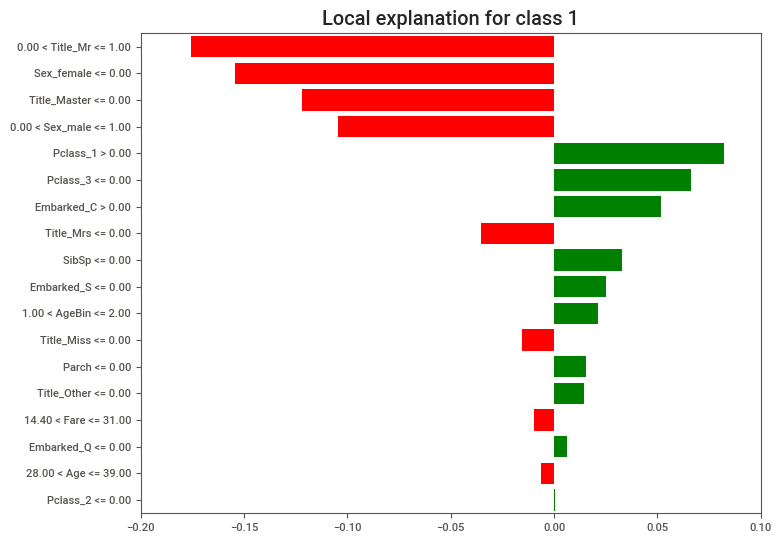

In [ ]:
xai(X_train, X_test, model=mlp_final)

#### Submission

In [ ]:
df_test = pd.read_csv("test.csv")

In [ ]:
XX = preprocess(df_test)

In [ ]:
result = np.array([mlp_final.predict(XX)])

In [ ]:
df_test = pd.read_csv("test.csv")

c = ["Survived"]
df_submission = pd.DataFrame(result)
df_submission = df_submission.T
df_submission.columns = c
df_submission.head()
df_submission = pd.concat([df_test.PassengerId, df_submission], axis=1, ignore_index=False)


In [ ]:
df_submission

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [ ]:
df_submission.to_csv("final.csv", index_label=False, index=False)